## Contents
- [Imports](#Data-Dictionary)
- [Regression Modeling Race](#Regression-Modeling-Race)  

# Imports

In [224]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm  import SVR, SVC
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures, PowerTransformer, OneHotEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

In [2]:
# Import the Texas data and sae to a dataframe.
df = pd.read_csv('../data/cleaned_numbers_five_states.csv')

In [3]:
# Display the first few rows of the dataframe.
df.head(2)

,county_state,total_cases,total_fatalities,death_rate,total_tests,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,...,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,deaths_per_100_cases,cases_per_100_people,tests_per_100_people,pop_density
0,"Santa Clara County, California",23978.0,388.0,0.016181,839764,1922200,495455,615912,45379,3003,...,116178,154183,52451,52592,90862,64739,1.618150,1.247425,43.687650,1488.824137
1,"San Mateo County, California",10942.0,159.0,0.014531,285657,765935,189002,303047,16838,1151,...,113776,162639,57375,51601,79347,65524,1.453116,1.428581,37.295201,1707.252650


# Feature Engineering

### Ordinal COVID Severity

In [4]:
df['covid_severity'] = 0

In [5]:
mask1 = df['cases_per_100_people'] < 2
mask2 = (df['cases_per_100_people'] >= 2) & (df['cases_per_100_people'] < 4)
mask3 = df['cases_per_100_people'] >= 4

In [6]:
df['covid_severity'][mask1] = 1

In [7]:
df['covid_severity'][mask2] = 2

In [8]:
df['covid_severity'][mask3] = 3

In [9]:
df['covid_severity'].value_counts()

2    239
1    228
3     76
Name: covid_severity, dtype: int64

### Demographic Recombinations

In [10]:
df['inc_hhlds_less_than_25_000'] = df['inc_hhlds_less_than_10_000'] \
                        + df['inc_hhlds_10_000_to_14_999'] + df['inc_hhlds_15_000_to_24_999']

df['inc_hhlds_25_000_to_49_999'] = df['inc_hhlds_25_000_to_34_999'] \
                        + df['inc_hhlds_35_000_to_49_999']

df['inc_hhlds_less_than_99_999'] = df['inc_hhlds_less_than_10_000'] \
                        + df['inc_hhlds_10_000_to_14_999'] + df['inc_hhlds_15_000_to_24_999']\
                        + df['inc_hhlds_25_000_to_34_999'] + df['inc_hhlds_35_000_to_49_999']\
                        + df['inc_hhlds_50_000_to_74_999'] + df['inc_hhlds_75_000_to_99_999']\

df['inc_hhlds_100_000_or_more'] = df['inc_hhlds_100_000_to_149_999'] \
                        + df['inc_hhlds_150_000_to_199_999']

df['inc_hhlds_less_than_49_999'] = df['inc_hhlds_less_than_10_000'] \
                        + df['inc_hhlds_10_000_to_14_999'] + df['inc_hhlds_15_000_to_24_999']\
                        + df['inc_hhlds_25_000_to_34_999'] + df['inc_hhlds_35_000_to_49_999']\

df['inc_hhlds_50_000_to_99_999'] = df['inc_hhlds_50_000_to_74_999'] + df['inc_hhlds_75_000_to_99_999']

df['inc_hhlds_100_000_or_more'] = df['inc_hhlds_100_000_to_149_999'] \
                        + df['inc_hhlds_150_000_to_199_999']

In [11]:
df['race_pop_other'] = df['race_pop_american_indian_and_alaska_native_alone'] \
                        + df['race_pop_native_hawaiian_and_other_pacific_islander_alone'] \
                        + df['race_pop_some_other_race_alone'] + df['race_pop_two_or_more_races']

df['race_pop_minority'] = df['race_pop_american_indian_and_alaska_native_alone'] \
                        + df['race_pop_native_hawaiian_and_other_pacific_islander_alone'] \
                        + df['race_pop_some_other_race_alone'] + df['race_pop_two_or_more_races'] \
                        + df['race_pop_hispanic_or_latino_of_any_race']\
                        + df['race_pop_black_or_african_american_alone'] + df['race_pop_asian_alone']

In [12]:
df['sex_age_pop_0_to_44'] = df['sex_age_pop_under_5'] + df['sex_age_pop_5_to_9'] \
                    + df['sex_age_pop_10_to_14'] + df['sex_age_pop_15_to_19'] \
                    + df['sex_age_pop_20_to_24'] + df['sex_age_pop_25_to_34'] + df['sex_age_pop_35_to_44']

df['sex_age_pop_45_to_74'] = df['sex_age_pop_45_to_54'] + df['sex_age_pop_55_to_59'] \
                    + df['sex_age_pop_60_to_64'] + df['sex_age_pop_65_to_74']

df['sex_age_pop_75_and_over'] = df['sex_age_pop_75_to_84'] + df['sex_age_pop_85_and_over']

df['sex_age_pop_0_to_64'] = df['sex_age_pop_under_5'] + df['sex_age_pop_5_to_9'] + df['sex_age_pop_10_to_14']\
                        + df['sex_age_pop_15_to_19'] + df['sex_age_pop_20_to_24'] + df['sex_age_pop_25_to_34'] \
                        + df['sex_age_pop_35_to_44'] + df['sex_age_pop_45_to_54'] + df['sex_age_pop_55_to_59'] \
                        + df['sex_age_pop_60_to_64']

df['sex_age_pop_65_and_over'] = df['sex_age_pop_65_to_74'] + df['sex_age_pop_75_to_84']\
                        + df['sex_age_pop_85_and_over']

df['sex_age_pop_0_to_35'] = df['sex_age_pop_under_5'] + df['sex_age_pop_5_to_9']\
                        + df['sex_age_pop_10_to_14'] + df['sex_age_pop_15_to_19']\
                        + df['sex_age_pop_20_to_24'] + df['sex_age_pop_25_to_34']

df['sex_age_pop_35_to_59'] = df['sex_age_pop_35_to_44'] + df['sex_age_pop_45_to_54'] \
                        + df['sex_age_pop_55_to_59']

df['sex_age_pop_60_to_84'] = df['sex_age_pop_60_to_64'] + df['sex_age_pop_65_to_74'] \
                        + df['sex_age_pop_75_to_84']

In [13]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('race_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['race_pop']
        elif column.startswith('sex_age_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['sex_age_pop']            
        elif column.startswith('health_ins_noninst_pop_cov'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['health_ins_noninst_pop']
        elif column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    return

In [14]:
to_percentage(df)

In [15]:
list(df.columns)

['county_state',
 'total_cases',
 'total_fatalities',
 'death_rate',
 'total_tests',
 'race_pop',
 'race_pop_hispanic_or_latino_of_any_race',
 'race_pop_white_alone',
 'race_pop_black_or_african_american_alone',
 'race_pop_american_indian_and_alaska_native_alone',
 'race_pop_asian_alone',
 'race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'race_pop_some_other_race_alone',
 'race_pop_two_or_more_races',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'sex_age_median_age_in_years',
 'sq_mi',
 'obes_percent',
 'health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'healt

# Examine Outliers

In [16]:
# Define a custom function to help subplot histograms.
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, 
                       list_of_ylabels, figsize, bins, ncols, hspace):
    plt.style.use('seaborn-whitegrid')
    nrows = int(np.ceil(len(list_of_columns)/ncols))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize) 
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):

        ax[i].hist(dataframe[column], bins=bins)
        # Set title for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=14)
        
        # Set xlabel for each subplot
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)

        # Set ylabel for each subplot
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=12)

        plt.subplots_adjust(hspace=hspace);

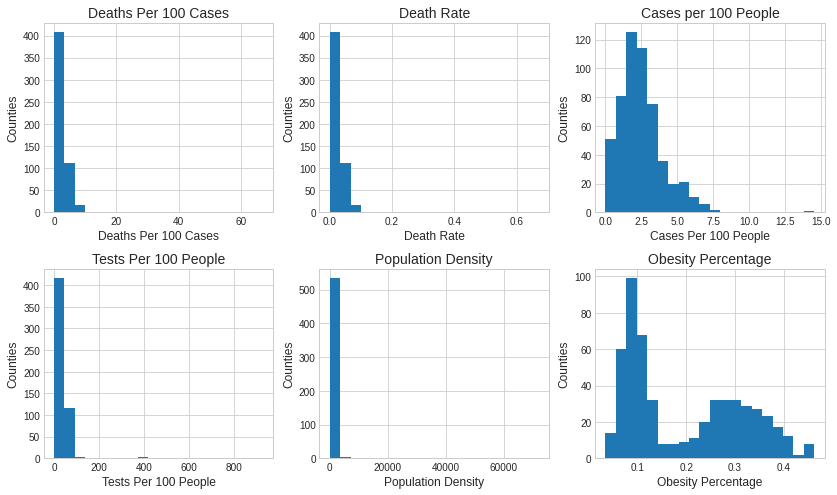

In [17]:
subplot_histograms(
    df,
    ['deaths_per_100_cases', 'death_rate', 'cases_per_100_people', 'tests_per_100_people', 'pop_density', 'obes_percent'],
    ['Deaths Per 100 Cases', 'Death Rate', 'Cases per 100 People', 'Tests Per 100 People', 'Population Density', 'Obesity Percentage'],
    ['Deaths Per 100 Cases', 'Death Rate', 'Cases Per 100 People', 'Tests Per 100 People', 'Population Density', 'Obesity Percentage'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(14,8),
    bins=20,
    ncols=3,
    hspace=.3
)

In [44]:
df[df['deaths_per_100_cases'] > 10]

,county_state,total_cases,total_fatalities,death_rate,total_tests,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,...,percent_race_pop_other,percent_race_pop_minority,percent_sex_age_pop_0_to_44,percent_sex_age_pop_45_to_74,percent_sex_age_pop_75_and_over,percent_sex_age_pop_0_to_64,percent_sex_age_pop_65_and_over,percent_sex_age_pop_0_to_35,percent_sex_age_pop_35_to_59,percent_sex_age_pop_60_to_84
257,"New York County, New York",35723.0,23963.0,0.670800,1380309,1632480,423683,765564,203849,1891,...,0.027589,0.531042,0.604295,0.324783,0.070922,0.842349,0.157651,0.460627,0.326155,0.189298
263,"Orleans County, New York",393.0,55.0,0.139949,19929,41175,1961,35622,2457,151,...,0.020376,0.134863,0.525586,0.404056,0.070358,0.831354,0.168646,0.413698,0.347784,0.219599
419,"Kenedy County, Texas",11.0,2.0,0.181818,86,595,522,72,0,0,...,0.000000,0.878992,0.544538,0.369748,0.085714,0.771429,0.228571,0.465546,0.290756,0.206723
512,"Throckmorton County, Texas",17.0,2.0,0.117647,118,1567,235,1292,16,0,...,0.015316,0.175495,0.467773,0.415444,0.116784,0.751117,0.248883,0.393108,0.275048,0.305680
519,"Upton County, Texas",27.0,3.0,0.111111,536,3634,1837,1525,237,5,...,0.002752,0.580352,0.604568,0.329664,0.065768,0.849752,0.150248,0.479086,0.316731,0.187672


In [45]:
# Drop outlier
df = df.drop(df[df['deaths_per_100_cases'] > 10].index)

In [18]:
# df[df['cases_per_100_people'] > 10]

,county_state,total_cases,total_fatalities,death_rate,total_tests,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,...,percent_race_pop_other,percent_race_pop_minority,percent_sex_age_pop_0_to_44,percent_sex_age_pop_45_to_74,percent_sex_age_pop_75_and_over,percent_sex_age_pop_0_to_64,percent_sex_age_pop_65_and_over,percent_sex_age_pop_0_to_35,percent_sex_age_pop_35_to_59,percent_sex_age_pop_60_to_84
90,"Lafayette County, Florida",1272.0,16.0,0.012579,2833,8744,1263,5806,1339,13,...,0.038426,0.336002,0.599268,0.346295,0.054437,0.865393,0.134607,0.449108,0.361391,0.173833


In [19]:
# # Drop outlier
# df = df.drop(df[df['cases_per_100_people'] > 10].index)

# Correlations all states

In [46]:
# Extract the columns with percentages, save to a new dataframe.
df_percent = df.filter(regex = 'percent', axis = 1)

In [47]:
# Other metrics from the original dataframe to carry over.
# These were not total counts and thus not calculated in percentage step.
df_temp = df[[
    'death_rate',
    'sex_age_median_age_in_years',
    'obes_percent',
    'inc_med_hhld_inc_dol',
    'inc_mean_hhld_inc_dol',
    'inc_per_capita_inc_dol',
    'inc_med_earn_workers_dol',
    'inc_med_earn_male_full_yr_workers_dol',
    'inc_med_earn_female_full_yr_workers_dol',
    'deaths_per_100_cases',
    'cases_per_100_people',
    'tests_per_100_people',
    'pop_density',
    'covid_severity',
]]

In [48]:
# Concatenate the two dataframes to get a complete feature set.
df_percent = pd.concat([df_temp, df_percent], axis=1)

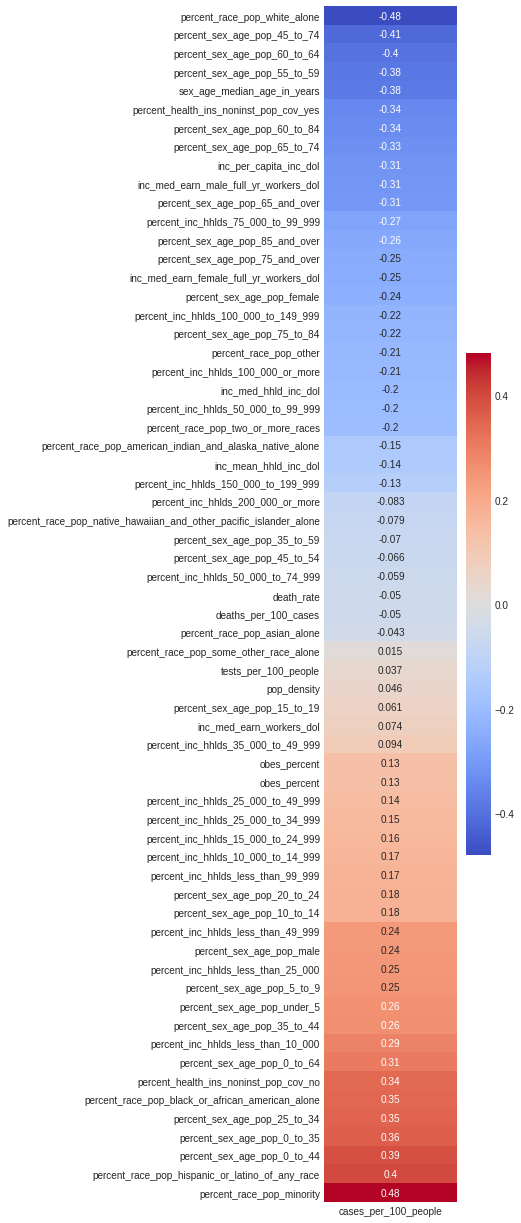

In [49]:
# Visualize the correlation between the variables.
# Save a correlation table to a variable.
corr = df_percent.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 22))
sns.heatmap(corr[['cases_per_100_people']].sort_values(by='cases_per_100_people').iloc[:-2], annot=True, cmap = 'coolwarm');

# Correlations top features no overlap

In [50]:
df_temp = df[[
    'death_rate',
    'sex_age_median_age_in_years',
    'obes_percent',
    'inc_med_hhld_inc_dol',
    'inc_mean_hhld_inc_dol',
    'inc_per_capita_inc_dol',
    'inc_med_earn_workers_dol',
    'inc_med_earn_male_full_yr_workers_dol',
    'inc_med_earn_female_full_yr_workers_dol',
    'deaths_per_100_cases',
    'cases_per_100_people',
    'tests_per_100_people',
    'pop_density',
    'covid_severity',
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_25_to_34',
    'percent_sex_age_pop_0_to_35',
    'percent_race_pop_minority',
    'percent_health_ins_noninst_pop_cov_no',
    'percent_health_ins_noninst_pop_cov_yes',
    'percent_race_pop_white_alone',
    'percent_sex_age_pop_45_to_74',
]]

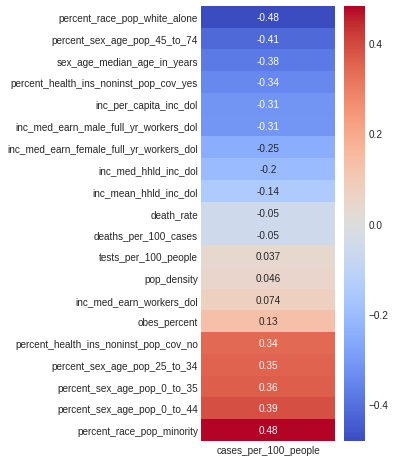

In [51]:
# Visualize the correlation between the variables.
# Save a correlation table to a variable.
corr = df_temp.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 8))
sns.heatmap(corr[['cases_per_100_people']].sort_values(by='cases_per_100_people').iloc[:-2], annot=True, cmap = 'coolwarm');

In [52]:
X = df_temp[[
    'sex_age_median_age_in_years',
    'percent_race_pop_minority',
    'percent_health_ins_noninst_pop_cov_no',
    'percent_race_pop_white_alone',
    'inc_per_capita_inc_dol'
]]

y = df_temp['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [54]:
y_train.min()

0.0

In [55]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [56]:
X_train.shape, y_test.shape

((402, 5), (135,))

In [57]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.10308654969164555

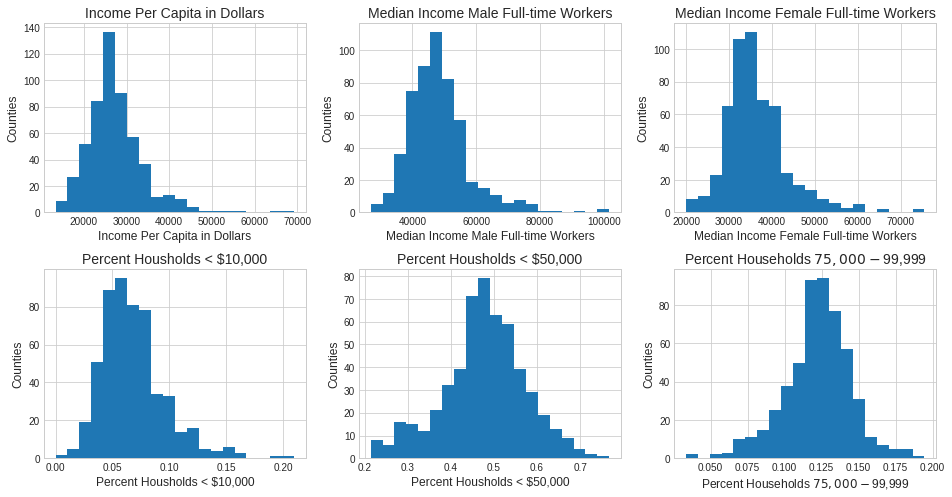

In [58]:
subplot_histograms(
    df_percent,
    ['inc_per_capita_inc_dol', 'inc_med_earn_male_full_yr_workers_dol', 'inc_med_earn_female_full_yr_workers_dol', 
     'percent_inc_hhlds_less_than_10_000', 'percent_inc_hhlds_less_than_49_999', 'percent_inc_hhlds_75_000_to_99_999'],
    ['Income Per Capita in Dollars', 'Median Income Male Full-time Workers', 'Median Income Female Full-time Workers', 
     'Percent Housholds < $10,000', 'Percent Housholds < $50,000', 'Percent Households $75,000-$99,999'],
    ['Income Per Capita in Dollars', 'Median Income Male Full-time Workers', 'Median Income Female Full-time Workers', 
     'Percent Housholds < $10,000', 'Percent Housholds < $50,000', 'Percent Households $75,000-$99,999'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(16,8),
    bins=20,
    ncols=3,
    hspace=.3
)

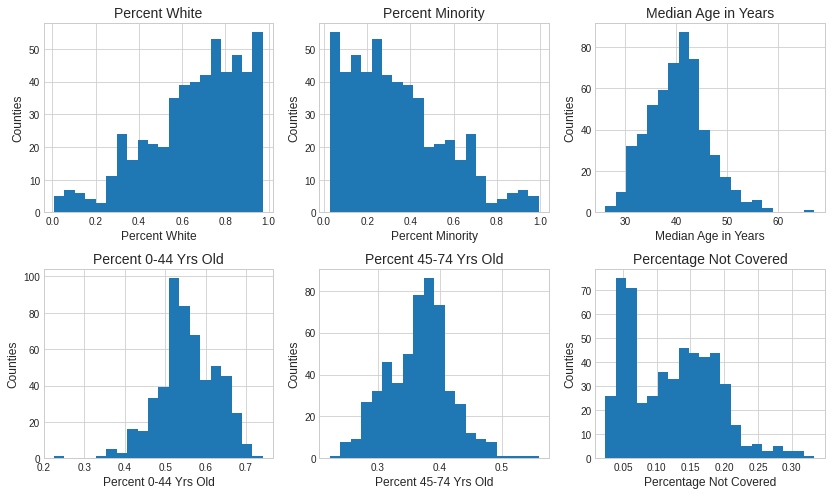

In [59]:
subplot_histograms(
    df_percent,
    ['percent_race_pop_white_alone', 'percent_race_pop_minority', 'sex_age_median_age_in_years', 
     'percent_sex_age_pop_0_to_44', 'percent_sex_age_pop_45_to_74', 'percent_health_ins_noninst_pop_cov_no'],
    ['Percent White', 'Percent Minority', 'Median Age in Years', 'Percent 0-44 Yrs Old', 
     'Percent 45-74 Yrs Old', 'Percentage Not Covered'],
    ['Percent White', 'Percent Minority', 'Median Age in Years', 'Percent 0-44 Yrs Old',
     'Percent 45-74 Yrs Old', 'Percentage Not Covered'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(14,8),
    bins=20,
    ncols=3,
    hspace=.3
)

## Model: GridSearchCV with SVR

In [99]:
# Assign our features to X.
X = df[[
    'obes_percent',
    'pop_density',
    'sex_age_median_age_in_years',
    'inc_med_hhld_inc_dol',
    'inc_mean_hhld_inc_dol',
    'inc_per_capita_inc_dol',
    'inc_med_earn_workers_dol',
    'inc_med_earn_male_full_yr_workers_dol',
    'inc_med_earn_female_full_yr_workers_dol',
     'percent_race_pop_hispanic_or_latino_of_any_race',
     'percent_race_pop_white_alone',
     'percent_race_pop_black_or_african_american_alone',
     'percent_race_pop_american_indian_and_alaska_native_alone',
     'percent_race_pop_asian_alone',
     'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
     'percent_race_pop_some_other_race_alone',
     'percent_race_pop_two_or_more_races',
     'percent_sex_age_pop_male',
     'percent_sex_age_pop_female',
     'percent_sex_age_pop_under_5',
     'percent_sex_age_pop_5_to_9',
     'percent_sex_age_pop_10_to_14',
     'percent_sex_age_pop_15_to_19',
     'percent_sex_age_pop_20_to_24',
     'percent_sex_age_pop_25_to_34',
     'percent_sex_age_pop_35_to_44',
     'percent_sex_age_pop_45_to_54',
     'percent_sex_age_pop_55_to_59',
     'percent_sex_age_pop_60_to_64',
     'percent_sex_age_pop_65_to_74',
     'percent_sex_age_pop_75_to_84',
     'percent_sex_age_pop_85_and_over',
     'percent_health_ins_noninst_pop_cov_yes',
     'percent_health_ins_noninst_pop_cov_no',
     'percent_inc_hhlds_less_than_10_000',
     'percent_inc_hhlds_10_000_to_14_999',
     'percent_inc_hhlds_15_000_to_24_999',
     'percent_inc_hhlds_25_000_to_34_999',
     'percent_inc_hhlds_35_000_to_49_999',
     'percent_inc_hhlds_50_000_to_74_999',
     'percent_inc_hhlds_75_000_to_99_999',
     'percent_inc_hhlds_100_000_to_149_999',
     'percent_inc_hhlds_150_000_to_199_999',
     'percent_inc_hhlds_200_000_or_more',
     'percent_inc_hhlds_less_than_25_000',
     'percent_inc_hhlds_25_000_to_49_999',
     'percent_inc_hhlds_less_than_99_999',
     'percent_inc_hhlds_100_000_or_more',
     'percent_inc_hhlds_less_than_49_999',
     'percent_inc_hhlds_50_000_to_99_999',
     'percent_race_pop_other',
     'percent_race_pop_minority',
     'percent_sex_age_pop_0_to_44',
     'percent_sex_age_pop_45_to_74',
     'percent_sex_age_pop_75_and_over',
     'percent_sex_age_pop_0_to_64',
     'percent_sex_age_pop_65_and_over',
     'percent_sex_age_pop_0_to_35',
     'percent_sex_age_pop_35_to_59',
     'percent_sex_age_pop_60_to_84'
]]

y = df['cases_per_100_people']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [100]:
# Display the shape of the training data.
X_train.shape

(402, 60)

In [118]:
# Create a main pipeline that will contain the dtype pipelines and the estimator.
pipe = make_pipeline(PowerTransformer(), PolynomialFeatures(), SelectKBest(f_regression), DecisionTreeRegressor())

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,300),
    'decisiontreeregressor__max_depth': [2, 3, 4],
    'decisiontreeregressor__min_samples_split': [1, 2, 3]
}

# Set up GridSearchCV with the pipe and R2 as the scoring method.
gs = GridSearchCV(pipe, param_grid=params, scoring='r2', cv=10, n_jobs=-1)

In [119]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

KeyboardInterrupt: 

In [112]:
# Display the best parameters.
gs.best_params_

{'selectkbest__k': 114, 'svr__C': 10}

In [113]:
# Display the score for the test set.
gs.score(X_test, y_test)

0.2976588980427719

In [114]:
# Display the score for the train set.
gs.score(X_train, y_train)

0.9365182371570553

In [115]:
# Calculate the RMSE for the model.
y_preds = gs.predict(X_test)
print('RMSE of Model:', mean_squared_error(y_test, y_preds, squared=False))

RMSE of Model: 1.300009413671589


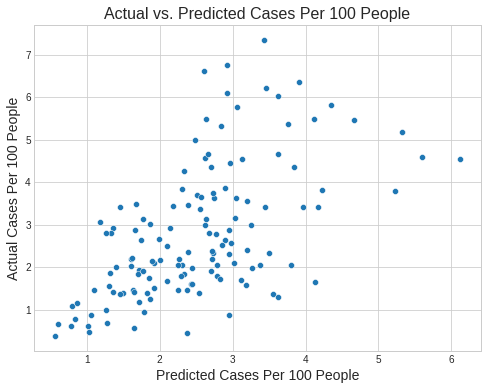

In [116]:
# Plot the predicted sale price versus the actual sale price
plt.figure(figsize=(8,6))
sns.scatterplot(y_preds, y_test)
plt.title('Actual vs. Predicted Cases Per 100 People', fontsize=16)
plt.xlabel('Predicted Cases Per 100 People', fontsize=14)
plt.ylabel('Actual Cases Per 100 People', fontsize=14);

## Model: GridSearchCV with Classifier

In [241]:
# Assign our features to X.
X = df[[
    'obes_percent',
    'pop_density',
    'sex_age_median_age_in_years',
    'inc_med_hhld_inc_dol',
    'inc_mean_hhld_inc_dol',
    'inc_per_capita_inc_dol',
    'inc_med_earn_workers_dol',
    'inc_med_earn_male_full_yr_workers_dol',
    'inc_med_earn_female_full_yr_workers_dol',
     'percent_race_pop_hispanic_or_latino_of_any_race',
     'percent_race_pop_white_alone',
     'percent_race_pop_black_or_african_american_alone',
     'percent_race_pop_american_indian_and_alaska_native_alone',
     'percent_race_pop_asian_alone',
     'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
     'percent_race_pop_some_other_race_alone',
     'percent_race_pop_two_or_more_races',
     'percent_sex_age_pop_male',
     'percent_sex_age_pop_female',
     'percent_sex_age_pop_under_5',
     'percent_sex_age_pop_5_to_9',
     'percent_sex_age_pop_10_to_14',
     'percent_sex_age_pop_15_to_19',
     'percent_sex_age_pop_20_to_24',
     'percent_sex_age_pop_25_to_34',
     'percent_sex_age_pop_35_to_44',
     'percent_sex_age_pop_45_to_54',
     'percent_sex_age_pop_55_to_59',
     'percent_sex_age_pop_60_to_64',
     'percent_sex_age_pop_65_to_74',
     'percent_sex_age_pop_75_to_84',
     'percent_sex_age_pop_85_and_over',
     'percent_health_ins_noninst_pop_cov_yes',
     'percent_health_ins_noninst_pop_cov_no',
     'percent_inc_hhlds_less_than_10_000',
     'percent_inc_hhlds_10_000_to_14_999',
     'percent_inc_hhlds_15_000_to_24_999',
     'percent_inc_hhlds_25_000_to_34_999',
     'percent_inc_hhlds_35_000_to_49_999',
     'percent_inc_hhlds_50_000_to_74_999',
     'percent_inc_hhlds_75_000_to_99_999',
     'percent_inc_hhlds_100_000_to_149_999',
     'percent_inc_hhlds_150_000_to_199_999',
     'percent_inc_hhlds_200_000_or_more',
     'percent_inc_hhlds_less_than_25_000',
     'percent_inc_hhlds_25_000_to_49_999',
     'percent_inc_hhlds_less_than_99_999',
     'percent_inc_hhlds_100_000_or_more',
     'percent_inc_hhlds_less_than_49_999',
     'percent_inc_hhlds_50_000_to_99_999',
     'percent_race_pop_other',
     'percent_race_pop_minority',
     'percent_sex_age_pop_0_to_44',
     'percent_sex_age_pop_45_to_74',
     'percent_sex_age_pop_75_and_over',
     'percent_sex_age_pop_0_to_64',
     'percent_sex_age_pop_65_and_over',
     'percent_sex_age_pop_0_to_35',
     'percent_sex_age_pop_35_to_59',
     'percent_sex_age_pop_60_to_84'
]]

y = df['covid_severity']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [242]:
# Display the shape of the training data.
X_train.shape

(402, 60)

In [279]:
# Create a main pipeline that will contain the dtype pipelines and the estimator.
pipe = make_pipeline(StandardScaler(), SelectKBest(), LogisticRegression())

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,300),
    'logisticregression__C': [.1, .5, 1, 10]
}

# Set up GridSearchCV with the pipe and R2 as the scoring method.
gs = GridSearchCV(pipe, param_grid=params, cv=10, n_jobs=-1)

In [280]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 0.5, 1, 10],
                         'selectkbest__k': range(1, 300)})

In [281]:
# Display the best parameters.
gs.best_params_

{'logisticregression__C': 1, 'selectkbest__k': 52}

In [282]:
# Display the score for the test set.
gs.score(X_test, y_test)

0.6

In [283]:
# Display the score for the train set.
gs.score(X_train, y_train)

0.7562189054726368

In [284]:
y_preds = gs.predict(X_test)

In [285]:
from sklearn.metrics import mean_squared_error, recall_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, f1_score, accuracy_score

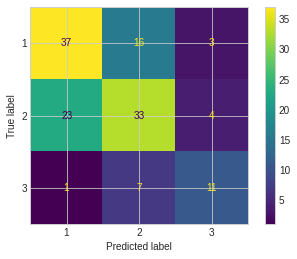

In [286]:
# Plot the predicted sale price versus the actual sale price
plot_confusion_matrix(gs, X_test, y_test);

In [287]:
accuracy_score(y_test, y_preds)

0.6

In [288]:
# Extract a boolean matrix of features selectkbest used in the best model.
features = gs.best_estimator_.named_steps['selectkbest'].get_support()
features

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [291]:
features = X_train.columns[features==True]

In [297]:
list(features)

['obes_percent',
 'pop_density',
 'sex_age_median_age_in_years',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'percent_race_pop_hispanic_or_latino_of_any_race',
 'percent_race_pop_white_alone',
 'percent_race_pop_black_or_african_american_alone',
 'percent_race_pop_american_indian_and_alaska_native_alone',
 'percent_race_pop_two_or_more_races',
 'percent_sex_age_pop_male',
 'percent_sex_age_pop_female',
 'percent_sex_age_pop_under_5',
 'percent_sex_age_pop_5_to_9',
 'percent_sex_age_pop_10_to_14',
 'percent_sex_age_pop_20_to_24',
 'percent_sex_age_pop_25_to_34',
 'percent_sex_age_pop_35_to_44',
 'percent_sex_age_pop_55_to_59',
 'percent_sex_age_pop_60_to_64',
 'percent_sex_age_pop_65_to_74',
 'percent_sex_age_pop_75_to_84',
 'percent_sex_age_pop_85_and_over',
 'percent_health_ins_noninst_pop_cov_yes',
 'percent_health_ins_noninst_pop_cov_no',
 'percent_inc_hhlds_less_

In [292]:
# Extract the coefficients for the features used in the best model.
coefs = gs.best_estimator_.named_steps['logisticregression'].coef_

In [296]:
coefs.shape

(3, 52)

In [295]:
pd.DataFrame(list(zip(features, coefs)))

,0,1
0,obes_percent,"[0.536377109762714, -0.4313485564476605, -0.09..."
1,pop_density,"[0.01978868117002283, 0.4543508119336458, 0.06..."
2,sex_age_median_age_in_years,"[-0.556165790932738, -0.023002255485984877, 0...."


## Model: GridSearchCV with Ridge: 34% R2!

In [87]:
# Assign our features to X.
X = df[[
    'obes_percent',
    'pop_density',
    'sex_age_median_age_in_years',
    'inc_med_hhld_inc_dol',
    'inc_mean_hhld_inc_dol',
    'inc_per_capita_inc_dol',
    'inc_med_earn_workers_dol',
    'inc_med_earn_male_full_yr_workers_dol',
    'inc_med_earn_female_full_yr_workers_dol',
     'percent_race_pop_hispanic_or_latino_of_any_race',
     'percent_race_pop_white_alone',
     'percent_race_pop_black_or_african_american_alone',
     'percent_race_pop_american_indian_and_alaska_native_alone',
     'percent_race_pop_asian_alone',
     'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
     'percent_race_pop_some_other_race_alone',
     'percent_race_pop_two_or_more_races',
     'percent_sex_age_pop_male',
     'percent_sex_age_pop_female',
     'percent_sex_age_pop_under_5',
     'percent_sex_age_pop_5_to_9',
     'percent_sex_age_pop_10_to_14',
     'percent_sex_age_pop_15_to_19',
     'percent_sex_age_pop_20_to_24',
     'percent_sex_age_pop_25_to_34',
     'percent_sex_age_pop_35_to_44',
     'percent_sex_age_pop_45_to_54',
     'percent_sex_age_pop_55_to_59',
     'percent_sex_age_pop_60_to_64',
     'percent_sex_age_pop_65_to_74',
     'percent_sex_age_pop_75_to_84',
     'percent_sex_age_pop_85_and_over',
     'percent_health_ins_noninst_pop_cov_yes',
     'percent_health_ins_noninst_pop_cov_no',
     'percent_inc_hhlds_less_than_10_000',
     'percent_inc_hhlds_10_000_to_14_999',
     'percent_inc_hhlds_15_000_to_24_999',
     'percent_inc_hhlds_25_000_to_34_999',
     'percent_inc_hhlds_35_000_to_49_999',
     'percent_inc_hhlds_50_000_to_74_999',
     'percent_inc_hhlds_75_000_to_99_999',
     'percent_inc_hhlds_100_000_to_149_999',
     'percent_inc_hhlds_150_000_to_199_999',
     'percent_inc_hhlds_200_000_or_more',
     'percent_inc_hhlds_less_than_25_000',
     'percent_inc_hhlds_25_000_to_49_999',
     'percent_inc_hhlds_less_than_99_999',
     'percent_inc_hhlds_100_000_or_more',
     'percent_inc_hhlds_less_than_49_999',
     'percent_inc_hhlds_50_000_to_99_999',
     'percent_race_pop_other',
     'percent_race_pop_minority',
     'percent_sex_age_pop_0_to_44',
     'percent_sex_age_pop_45_to_74',
     'percent_sex_age_pop_75_and_over',
     'percent_sex_age_pop_0_to_64',
     'percent_sex_age_pop_65_and_over',
     'percent_sex_age_pop_0_to_35',
     'percent_sex_age_pop_35_to_59',
     'percent_sex_age_pop_60_to_84'
]]

y = df['cases_per_100_people']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [88]:
# Display the shape of the training data.
X_train.shape

(402, 60)

In [89]:
# Create a main pipeline that will contain the dtype pipelines and the estimator.
pipe = make_pipeline(PowerTransformer(), PolynomialFeatures(), SelectKBest(f_regression), Ridge(max_iter=20_000))

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,300),
    'ridge__alpha': [1, 10, 20, 30, 100, 150, 200]
}

# Set up GridSearchCV with the pipe and R2 as the scoring method.
gs = GridSearchCV(pipe, param_grid=params, scoring='r2', cv=10, n_jobs=-1)

In [90]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('powertransformer', PowerTransformer()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f5c316eea70>)),
                                       ('ridge', Ridge(max_iter=20000))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [1, 10, 20, 30, 100, 150, 200],
                         'selectkbest__k': range(1, 300)},
             scoring='r2')

In [91]:
# Display the best parameters.
gs.best_params_

{'ridge__alpha': 1, 'selectkbest__k': 26}

In [92]:
# Display the score for the test set.
gs.score(X_test, y_test)

0.34123168684279637

In [93]:
# Display the score for the train set.
gs.score(X_train, y_train)

0.4856365817416619

In [94]:
# Calculate the RMSE for the model.
y_preds = gs.predict(X_test)
print('RMSE of Model:', mean_squared_error(y_test, y_preds, squared=False))

RMSE of Model: 1.2590379055477516


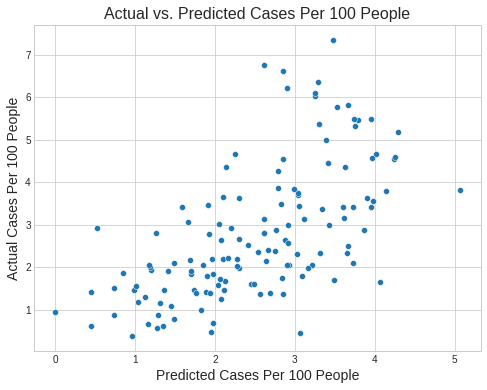

In [96]:
# Plot the predicted sale price versus the actual sale price
plt.figure(figsize=(8,6))
sns.scatterplot(y_preds, y_test)
plt.title('Actual vs. Predicted Cases Per 100 People', fontsize=16)
plt.xlabel('Predicted Cases Per 100 People', fontsize=14)
plt.ylabel('Actual Cases Per 100 People', fontsize=14);

## Model: GridSearchCV with Ridge

In [78]:
# Assign our features to X.
X = df[[
    'sex_age_median_age_in_years',
    'percent_race_pop_minority',
    'percent_health_ins_noninst_pop_cov_no',
    'percent_race_pop_white_alone',
    'inc_per_capita_inc_dol',
    'percent_race_pop_white_alone',
    'percent_sex_age_pop_male',
    'percent_health_ins_noninst_pop_cov_no',
    'percent_inc_hhlds_less_than_10_000',
    'percent_inc_hhlds_75_000_to_99_999',
    'percent_inc_hhlds_less_than_49_999',
    'percent_race_pop_minority',
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_45_to_74',
    'percent_sex_age_pop_75_and_over',
    'obes_percent',
    'pop_density',
]]

y = df['cases_per_100_people']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [79]:
# Display the shape of the training data.
X_train.shape

(402, 17)

In [80]:
# Create a main pipeline that will contain the dtype pipelines and the estimator.
pipe = make_pipeline(PowerTransformer(), PolynomialFeatures(), SelectKBest(f_regression), Ridge(max_iter=20_000))

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,300),
    'ridge__alpha': [1, 10, 20, 30, 100, 150, 200]
}

# Set up GridSearchCV with the pipe and R2 as the scoring method.
gs = GridSearchCV(pipe, param_grid=params, scoring='r2', cv=10, n_jobs=-1)

In [81]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('powertransformer', PowerTransformer()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f5c316eea70>)),
                                       ('ridge', Ridge(max_iter=20000))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [1, 10, 20, 30, 100, 150, 200],
                         'selectkbest__k': range(1, 300)},
             scoring='r2')

In [82]:
# Display the best parameters.
gs.best_params_

{'ridge__alpha': 200, 'selectkbest__k': 141}

In [83]:
# Display the score for the test set.
gs.score(X_test, y_test)

0.28518357244466197

In [84]:
# Display the score for the train set.
gs.score(X_train, y_train)

0.5320398991162153

In [85]:
# Calculate the RMSE for the model.
y_preds = gs.predict(X_test)
print('RMSE of Model:', mean_squared_error(y_test, y_preds, squared=False))

RMSE of Model: 1.3115042949188689


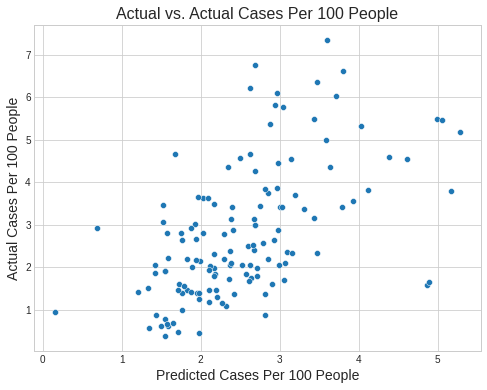

In [86]:
# Plot the predicted sale price versus the actual sale price
plt.figure(figsize=(8,6))
sns.scatterplot(y_preds, y_test)
plt.title('Actual vs. Actual Cases Per 100 People', fontsize=16)
plt.xlabel('Predicted Cases Per 100 People', fontsize=14)
plt.ylabel('Actual Cases Per 100 People', fontsize=14);

## Model: GridSearchCV with Ridge

In [60]:
# Assign our features to X.
X = df_temp[[
    'sex_age_median_age_in_years',
    'percent_race_pop_minority',
    'percent_health_ins_noninst_pop_cov_no',
    'percent_race_pop_white_alone',
    'inc_per_capita_inc_dol'
]]

y = df_temp['cases_per_100_people']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
# Display the shape of the training data.
X_train.shape

(402, 5)

In [69]:
# Create a main pipeline that will contain the dtype pipelines and the estimator.
pipe = make_pipeline(PowerTransformer(), PolynomialFeatures(), SelectKBest(f_regression), Ridge(max_iter=20_000))

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,300),
    'ridge__alpha': [1, 10, 20, 30, 100, 150, 200]
}

# Set up GridSearchCV with the pipe and R2 as the scoring method.
gs = GridSearchCV(pipe, param_grid=params, scoring='r2', cv=10, n_jobs=-1)

In [70]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('powertransformer', PowerTransformer()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f5c316eea70>)),
                                       ('ridge', Ridge(max_iter=20000))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [1, 10, 20, 30, 100, 150, 200],
                         'selectkbest__k': range(1, 300)},
             scoring='r2')

In [71]:
# Display the best parameters.
gs.best_params_

{'ridge__alpha': 200, 'selectkbest__k': 18}

In [72]:
# Display the score for the test set.
gs.score(X_test, y_test)

0.1672951795587353

In [73]:
# Display the score for the train set.
gs.score(X_train, y_train)

0.2836062055110167

In [74]:
# Calculate the RMSE for the model.
y_preds = gs.predict(X_test)
print('RMSE of Model:', mean_squared_error(y_test, y_preds, squared=False))

RMSE of Model: 1.4155264674293784


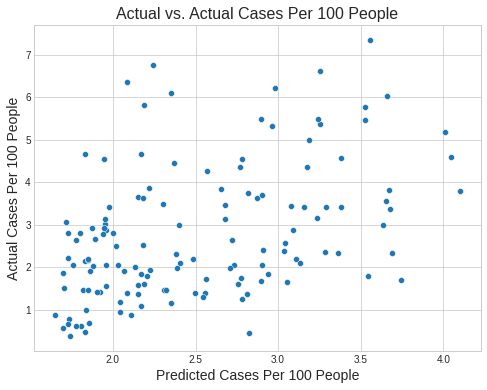

In [75]:
# Plot the predicted sale price versus the actual sale price
plt.figure(figsize=(8,6))
sns.scatterplot(y_preds, y_test)
plt.title('Actual vs. Actual Cases Per 100 People', fontsize=16)
plt.xlabel('Predicted Cases Per 100 People', fontsize=14)
plt.ylabel('Actual Cases Per 100 People', fontsize=14);

# Placeholder for TX

In [127]:
df = df.drop(df[df['death_rate'] > 0.1].index)

In [129]:
df[df['deaths_per_100_cases'] > 10][['total_cases', 'total_fatalities', 'death_rate', 'total_tests', 'deaths_per_100_cases']]

,total_cases,total_fatalities,death_rate,total_tests,deaths_per_100_cases
county_state,,,,,


In [130]:
df[df['tests_per_100_people'] > 100][['race_pop', 'total_cases', 'total_fatalities', 'death_rate', 'total_tests', 'tests_per_100_people', 'deaths_per_100_cases']]

,race_pop,total_cases,total_fatalities,death_rate,total_tests,tests_per_100_people,deaths_per_100_cases
county_state,,,,,,,
"Champaign County, Illinois",209448,6091.0,29.0,0.004761,755316,360.622207,0.476112
"Tompkins County, New York",102962,603.0,0.0,0.000000,403145,391.547367,0.000000
"DeWitt County, Texas",20435,1078.0,44.0,0.040816,189284,926.273550,4.081633
"Ellis County, Texas",168838,4875.0,76.0,0.015590,292857,173.454436,1.558974
"Marion County, Texas",10083,170.0,14.0,0.082353,10893,108.033323,8.235294
"Martin County, Texas",5614,89.0,7.0,0.078652,22399,398.984681,7.865169
"Matagorda County, Texas",36743,1094.0,53.0,0.048446,91904,250.126555,4.844607


In [131]:
df = df.drop(df[df['tests_per_100_people'] > 100].index)

In [132]:
df = df.drop(df[df['deaths_per_100_cases'] > 10].index)

In [51]:
X = df[[
    'percent_race_pop_hispanic_or_latino_of_any_race',
    'percent_sex_age_pop_25_to_34',
    'percent_race_pop_black_or_african_american_alone',
    'percent_health_ins_noninst_pop_cov_no',
    'percent_inc_hhlds_less_than_10_000',
    'percent_sex_age_pop_35_to_44',
    'percent_sex_age_pop_male',
    'percent_race_pop_white_alone',
    'percent_sex_age_pop_60_to_64',
    'sex_age_median_age_in_years',
    'percent_sex_age_pop_55_to_59',
    'percent_sex_age_pop_65_to_74',
    'inc_per_capita_inc_dol',
    'percent_health_ins_noninst_pop_cov_yes',
    'inc_med_earn_male_full_yr_workers_dol',
    'percent_sex_age_pop_85_and_over',
    'percent_sex_age_pop_female',
    'percent_inc_hhlds_75_000_to_99_999'
]]

y = df['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [53]:
y_train.min()

2.0132971251989886

In [54]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [55]:
X_train.shape, y_test.shape

((236, 18), (79,))

In [56]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.04450070640657855

In [94]:
X = df[[
    'percent_race_pop_white_alone',
    'sex_age_median_age_in_years',
    'percent_sex_age_pop_65_to_74',
    'percent_sex_age_pop_60_to_64',
    'percent_sex_age_pop_55_to_59',
    'percent_race_pop_hispanic_or_latino_of_any_race',
    'tests_per_100_people',
    'percent_sex_age_pop_25_to_34',
]]

y = df['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [95]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [96]:
y_train.min()

0.0

In [97]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [98]:
X_train.shape, y_test.shape

((398, 8), (133,))

In [99]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.02703197693394699